# Image Classification - Lab

## Introduction

Now that you have a working knowledge of CNNs and have practiced implementing associated techniques in Keras, its time to put all of those skills together. In this lab, you'll work to complete a Kaggle competition on classifying dog breeds.

https://www.kaggle.com/c/dog-breed-identification

## Objectives

You will be able to:
* Independently design and build a CNN for image classifcation tasks
* Compare and apply multiple techniques for tuning a model including data augmentation and adapting pretrained models

## Download and Load the Data

Start by downloading the data locally and loading it into a Pandas DataFrame. Be forewarened that this dataset is fairly large and it is advisable to close other memory intensive applications.

The data can be found here:

https://www.kaggle.com/c/dog-breed-identification/data

We recommend downloading the data into this directory on your local computer. From there, be sure to uncompress the folder and subfolders.

In [1]:
#No code persay, but download and decompress the data.

## Preprocessing

Now that you've downloaded the data, its time to prepare it for some model building! You'll notice that the current structure provided is not the same as our lovely preprocessed folders that we've been providing you. Instead, you have one large training folder with images and a csv file with labels associated with each of these file types. 

Use this to create a directory substructure for a train-validation-test split as we have done previously. Also recall from our previous work that you'll also want to use one-hot encoding as we are now presented with a multi-class problem as opposed to simple binary classification.

In [2]:
#Your code here; open the labels.csv file stored in the zip file
import pandas as pd
df=pd.read_csv('labels.csv')

We wish to create our standard directory structure:
* train
    * category1
    * category2
    * category3
    ...
* val
    * category1
    * category2
    * category3
    ...
* test 
    * category1
    * category2
    * category3
    ...  

In [5]:
#Your code here; transform the image files and then load them into Keras as tensors 
#(be sure to perform a train-val-test split)
import numpy as np
import os, shutil

old_dir = 'train/'

new_root_dir = 'data_org4/'
os.mkdir(new_root_dir)

dir_names = ['train', 'val', 'test']
for d in dir_names:
    new_dir = os.path.join(new_root_dir, d)
    os.mkdir(new_dir)
    
for breed in df.breed.unique():
    print('Moving {} pictures.'.format(breed))
    #Create sub_directories
    for d in dir_names:
        new_dir = os.path.join(new_root_dir, d, breed)
        os.mkdir(new_dir)
    #Subset dataframe into train, validate and split sets
    #Split is performed here to ensure maintain class distributions.
    temp = df[df.breed == breed]
    train, validate, test = np.split(temp.sample(frac=1), [int(.8*len(temp)), int(.9*len(temp))])
    print('Split {} imgs into {} train, {} val, and {} test examples.'.format(len(temp),
                                                                              len(train),
                                                                              len(validate),
                                                                              len(test)))
    for i, temp in enumerate([train, validate, test]):
        for row in temp.index:
            filename = temp['id'][row] + '.jpg'
            origin = os.path.join(old_dir + filename)
            destination = os.path.join(new_root_dir + dir_names[i] + '/' + breed + '/' + filename)
            shutil.copy(origin, destination)

Moving boston_bull pictures.
Split 87 imgs into 69 train, 9 val, and 9 test examples.
Moving dingo pictures.
Split 80 imgs into 64 train, 8 val, and 8 test examples.
Moving pekinese pictures.
Split 75 imgs into 60 train, 7 val, and 8 test examples.
Moving bluetick pictures.
Split 85 imgs into 68 train, 8 val, and 9 test examples.
Moving golden_retriever pictures.
Split 67 imgs into 53 train, 7 val, and 7 test examples.
Moving bedlington_terrier pictures.
Split 89 imgs into 71 train, 9 val, and 9 test examples.
Moving borzoi pictures.
Split 75 imgs into 60 train, 7 val, and 8 test examples.
Moving basenji pictures.
Split 110 imgs into 88 train, 11 val, and 11 test examples.
Moving scottish_deerhound pictures.
Split 126 imgs into 100 train, 13 val, and 13 test examples.
Moving shetland_sheepdog pictures.
Split 76 imgs into 60 train, 8 val, and 8 test examples.
Moving walker_hound pictures.
Split 69 imgs into 55 train, 7 val, and 7 test examples.
Moving maltese_dog pictures.
Split 117 img

Moving dandie_dinmont pictures.
Split 89 imgs into 71 train, 9 val, and 9 test examples.
Moving great_pyrenees pictures.
Split 111 imgs into 88 train, 11 val, and 12 test examples.
Moving beagle pictures.
Split 105 imgs into 84 train, 10 val, and 11 test examples.
Moving vizsla pictures.
Split 70 imgs into 56 train, 7 val, and 7 test examples.
Moving west_highland_white_terrier pictures.
Split 81 imgs into 64 train, 8 val, and 9 test examples.
Moving kerry_blue_terrier pictures.
Split 82 imgs into 65 train, 8 val, and 9 test examples.
Moving whippet pictures.
Split 95 imgs into 76 train, 9 val, and 10 test examples.
Moving sealyham_terrier pictures.
Split 88 imgs into 70 train, 9 val, and 9 test examples.
Moving standard_poodle pictures.
Split 79 imgs into 63 train, 8 val, and 8 test examples.
Moving keeshond pictures.
Split 81 imgs into 64 train, 8 val, and 9 test examples.
Moving japanese_spaniel pictures.
Split 105 imgs into 84 train, 10 val, and 11 test examples.
Moving miniature_p

In [7]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'data_org2/train'
validation_dir = 'data_org2/val/'
test_dir = 'data_org2/test/'
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),
                                                    batch_size=20,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),
                                                        batch_size=20,class_mode='categorical')

Found 8127 images belonging to 120 classes.
Found 1017 images belonging to 120 classes.


## Optional: Build a Baseline CNN

This is an optional step. Adapting a pretrained model will produce better results, but it may be interesting to create a CNN from scratch as a baseline. If you wish to, do so here.

In [ ]:
#Create a baseline CNN model

## Loading a Pretrained CNN

## Feature Engineering with the Pretrained Model

Now that you've loaded a pretrained model, it's time to adapt that convolutional base and add some fully connected layers on top in order to build a classifier from these feature maps.

In [8]:
#Your code here; add fully connected layers on top of the convolutional base
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(240, 240, 3))

#Define Model Architecture
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(120, activation='sigmoid'))

cnn_base.trainable = False

#You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute:
for layer in model.layers:
    print(layer.name, layer.trainable)
    
#Similarly, we can check how many trainable weights are in the model:
print(len(model.trainable_weights))

model.summary()

vgg19 False
flatten_1 True
dense_1 True
dense_2 True
dense_3 True
dense_4 True
dense_5 True
10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_______________________________________________

## Visualize History

Now fit the model and visualize the training and validation accuracy/loss functions over successive epochs.

In [9]:
#Your code here; visualize the training / validation history associated with fitting the model.
train_dir = 'data_org4/train'
validation_dir = 'data_org4/val/'
test_dir = 'data_org4/test/'


#Define Initial Parameters (same as previous code block)
datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 10

# get all the data in the directory split/train (542 images), and reshape them
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(240, 240), 
        batch_size= 20,
        class_mode= 'categorical') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        validation_dir, 
        target_size=(240, 240), 
        batch_size = 20,
        class_mode= 'categorical')

# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_dir, 
        target_size=(240, 240), 
        batch_size = 180,
        class_mode= 'categorical',
        shuffle=False)

test_images, test_labels = next(test_generator)


#Compilation
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

#Fitting the Model
history = model.fit_generator(
              train_generator,
              steps_per_epoch= 27,
              epochs = 10,
              validation_data = val_generator,
              validation_steps = 10)

Found 8127 images belonging to 120 classes.
Found 1017 images belonging to 120 classes.
Found 1078 images belonging to 120 classes.


W0708 09:38:30.075282  1324 deprecation_wrapper.py:119] From C:\Users\kylej\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0708 09:38:30.139282  1324 deprecation.py:323] From C:\Users\kylej\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
22/27 [=======================>......] - ETA: 11s - loss: 4.7913 - acc: 0.0068

KeyboardInterrupt: 

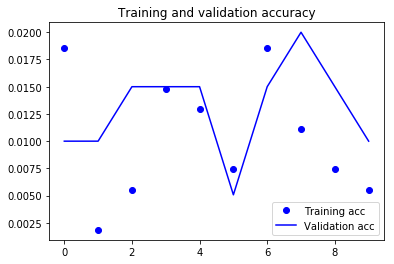

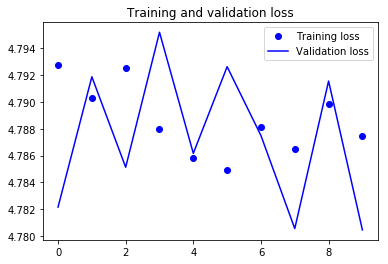

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [8]:
#Save model
model.save('vgg19_FE_AUG_10epochs.h5')

## Final Model Evaluation

In [ ]:
#Your code here

## Summary

Congratulations! In this lab, you brought all of your prior deep learning skills together from preprocessing including one-hot encoding, to adapting a pretrained model. There are always ongoing advancements in CNN architectures and best practices, but you have a solid foundation and understanding at this point.